# Introduction to Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

Predictive modeling, using a data samples to make predictions about unobserved or future events, is a common data analytics task. Predictive modeling is considered to be a form of machine learning.

Linear regression is a technique for predicting a response/dependent variable based on one or more explanatory/independent variables, or features. The term "linear" refers to the fact that the method models data as a linear combination of explanatory variables.  

Linear regression, in its simplest form, fits a straight line to the response variable data so that the line minimizes the squared differences (also called errors or residuals) between the actual obbserved response and the predicted point on the line. Since linear regression fits the observed data with a line, it is most effective when the response and the explanatory variable do have a linear relationship.


## Motivating Example: Advertising Data

Let us look at data depicting the money(in thousands of dollars) spent on TV, Radio and newspaper ads for a product in a given market, as well as the corresponding sales figures.

In [43]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The **features**?
- TV: advertising dollars spent on TV (for a single product, in a given market) 
- Radio: advertising dollars spent on Radio (for a single product, in a given market) 
- Newspaper: advertising dollars spent on Newspaper (for a single product, in a given market) 

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [44]:
# print the size of the DataFrame object, i.e., the size of the dataset
data.shape

(200, 4)

There are 200 **observations**, corresponding to 200 markets.

We can try to discover if there is any relationship between the money spend on a specific type of ad, in a given market, and the sales in that market by plotting the sales figures against each category of advertising expenditure.

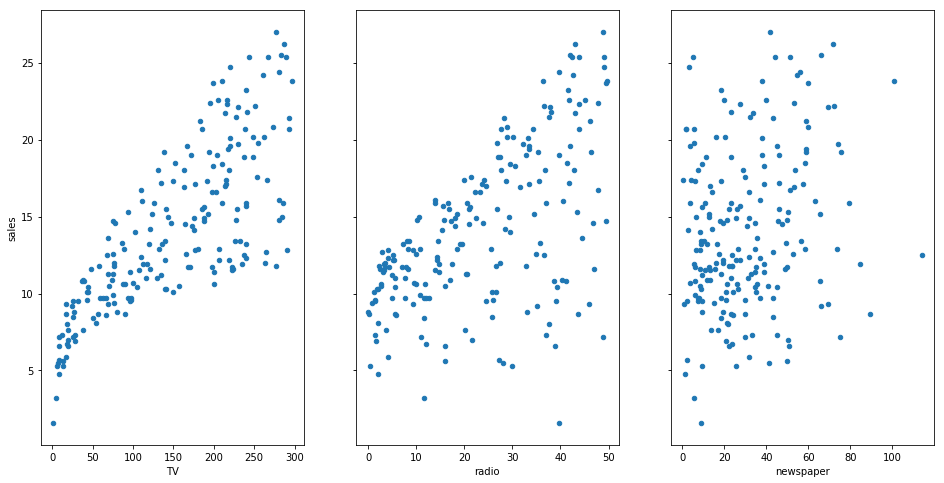

In [45]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

## Questions 

How can the company selling the product decide on how to spend its advertising money in the future? We first need to answer the following question: "Based on this data, does there apear to be a relationship between ads and sales?"

If yes, 
1. Which ad types contribute to sales?
2. How strong is the relationship between each ad type and sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will use Linear Regression to try and asnwer these questions.

## Simple Linear Regression

Simple linear regression is an approach for modeling the relatrionship between a **dependent variable** (a "response") and an **explanatory variable**, also known as a "predictor" or "feature". The relationship is modeled as a linear function $y = \beta_0 + \beta_1x$ whose parameters are estimated from the available data.

In the equation above:
- $y$ is called the response, regressand, endogenous variable, dependent variable, etc.
- $x$ is the feature, regressor, exogenous variable, explanatory variables, predictor, etc.
- $\beta_0$ is known as the intercept
- $\beta_1$ is the regression coefficient, effect, etc. 

Together, $\beta_0$ and $\beta_1$ are called **paramaters**, **model/regression coefficients**, or **effects**. To create a model, we must discover/learn/estimate the values of these coefficients. 

## Estimating/Learning Model/Regression Coefficients
Regression coefficients are estimated using a variety of methods. The **least squares method**, which finds the line which minimizes the **sum of squared residuals** (or "sum of squared errors") is among the most oftenly used.

In the pictures below:
- The blue dots are the **observed values** of x and y.
- The red line is the **least squares line**.
- The **residuals** are the distances between the observed values and the least squares line.

- $\beta_0$ is the **intercept** of the least squares line (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** of the least squares line, i.e. the ratio of the vertical change (in $y$) and the horizontal change (in $x$).

We can use the  **statsmodels** package to estimate the model coefficients for the advertising data:

In [46]:
import statsmodels.formula.api as sf

#create a model with Sales as dependent variable and TV as explanatory variable
model = sf.ols('sales ~ TV', data)

#fit the model to the data 
fitted_model = model.fit()

# print the coefficients
print(fitted_model.params)

Intercept    7.032594
TV           0.047537
dtype: float64


## Interpreting Model Coefficients

Q: How do we interpret the coefficient ($\beta_1$) of the explanatory variable "TV"?

A: A unit (a thousand dollars) increase in TV ad spending is **associated with** a 0.047537 unit (a thousand widgets) increase in Sales, i.e., an additional $1000 spent on TV ads is **associated with** an increase in sales of ~47.5 widgets.

Note that it is, in general, possible to have a negative effect, e.g., an increase in TV ad spending to be associated with a **decrease** in sales. $\beta_1$ would be **negative** in this case.

## Using the Model for Prediction

Can we use the model we develop to guide advertising spending decisions? For example, if the company spends $50,000 on TV advertising in a new market, what would the model predict for the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [47]:
7.032594 + 0.047537*50

9.409444

The predicted Sales in that market are of **9.409444 * 1000 =~ 9409 widgets**

Using Statsmodels:

In [48]:
# create a DataFrame to use with the Statsmodels formula interface
New_TV_spending = pd.DataFrame({'TV': [50]})

#check the newly created DataFrame
New_TV_spending.head()

,TV
0,50


In [49]:
# use the model created above to predict the sales to be generated by the new TV ad money
sales = fitted_model.predict(New_TV_spending)
print(sales)

0    9.409426
dtype: float64


## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of money spent on TV ads**, and then use the predicted values to plot the least squares line:

In [50]:
# create a DataFrame with the minimum and maximum values of TV ad money
New_TV_money = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
print(New_TV_money.head())

      TV
0    0.7
1  296.4


In [51]:
# make predictions for those x values and store them
sales_predictions = fitted_model.predict(New_TV_money)
print(sales_predictions)

0     7.065869
1    21.122454
dtype: float64


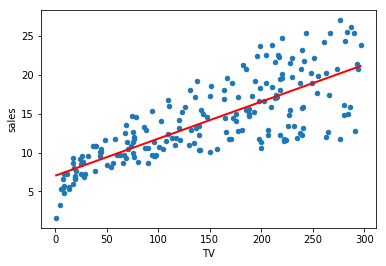

In [52]:
# plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# plot the least squares line
plt.plot(New_TV_money, sales_predictions, c='red', linewidth=2)

## Confidence in Linear Regression Models

**Q:** Is linear regression a high bias/low variance model, or a low variance/high bias model?

**A:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). (A low variance is a useful characteristic when limited training data is available.)

We can use Statsmodels to calculate 95% confidence intervals for the model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [53]:
# print the confidence intervals for the model coefficients
print(fitted_model.conf_int())

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


Since we only have a **single sample of data**, and not the **entire population** the "true" value of the regression coefficient is either within this interval or it isn't, but there is no way to actually know. 

We estimate the regression coefficient using the data we have, and then we characterize the uncertainty about that estimate by giving a confidence interval, an interval that will "probably" contain the  value coefficient. Note that there is no probability associated with the true value of the regression coefficient being in the given confidence interval!

Also note that using 95% confidence intervals is simply a convention. One can create 90% confidence intervals (narrower intervals), 99% confidence intervals (wider intervals), etc.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [54]:
# print the p-values for the model coefficients
fitted_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model to the available data is by calculating the **R-squared** (a.k.a, "coefficient of determination") value. 

R-squared has several interpretations:
(1) R-squared ×100 percent of the variation in the dependent variable ($y$) is reduced by taking into account predictor $x$
(2) R-squared is the proportion of variance in the observed data that is "explained" by the model.

R-squared is between 0 and 1, and, generally speaking, higher is considered to be better because more variance is accounted for ("explained") by the model.

Note, however, that R-squared does not indicate whether a regression model is actually good. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!

One should evaluate the adequacy of a model by looking at R-squared values as well as residual (i.e., observed value - fitted value) plots, other model statistics, and subject area knowledge.

The R-squared value for our simple linear regression model is:

In [55]:
# print the R-squared value for the model
fitted_model.rsquared

0.611875050850071

Is that a "good" R-squared value? One cannot generally assess that. What a "good" R-squared value is depends on the domain and therefore R-squared is most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can be extended to include multiple explanatory variables:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different predictor/feature, and each predictor has its own coefficient. In our case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [56]:
# create a model with all three features
multi_model = sf.ols(formula='sales ~ TV + radio + newspaper', data=data)
fitted_multi_model = multi_model.fit()

# print the coefficients
print(fitted_multi_model.params)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


How do we interpret the coefficients? For a given amount of Radio and Newspaper ad spending, an increase of a **unit** ($1000 dollars) in TV ad spending is associated with an **increase in Sales of 45.765 widgets**.

Other information is available in the model summary output:

In [57]:
# print a summary of the fitted model
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           1.58e-96
Time:                        22:47:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. 
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? 
- Try different models and check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the predictors/features being independent), and if those assumptions are violated (which they usually are), R-squared are less reliable.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize well to new data. For example:

In [58]:
# only include TV and Radio in the model
model1 = sf.ols(formula='sales ~ TV + radio', data=data).fit()
print(model1.rsquared)

0.8971942610828957


In [59]:
# add Newspaper to the model (which we believe has no association with Sales)
model2 = sf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
print(model2.rsquared)

0.8972106381789522


**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but this approach has its own set of issues.

Is there a better approach to feature selection? **Cross-validation**, which provides a more reliable estimate of out-of-sample error, and thus is better at choosing which model will better **generalize** to out-of-sample data. Cross-validation can be applied to any type of model, not just linear models.

## Linear Regression in scikit-learn

The work done using Statsmodels can also be using scikit-learn:

In [60]:
# create a DataFrame
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales


from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [61]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 0.04576464545539761), ('radio', 0.18853001691820462), ('newspaper', -0.0010374930424762972)]


In [62]:
# predict for a new observation
lm.predict([[100, 25, 25]])

array([12.20266701])

In [63]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789521

## Handling Categorical Predictors with Two Categories

What if one of the predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [64]:
import numpy as np

# create a Series of booleans in which roughly half are True

#generate len(data) numbers between 0 and 1
numbers = np.random.rand(len(data))

#create and index of 0s and 1s by based on whether the corresponding random number
#is greater than 0.5. 
index_for_large = (numbers > 0.5)

#create a new data column called Size and set its values to 'small'
data['Size'] = 'small'

# change the values of Size to 'large' whenever the corresponding value of the index is 1 
data.loc[index_for_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,large
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


When using scikit-learn, we need to represent all data **numerically**. For example, if the feature we want to represent has only two categories, we create a **dummy variable** that represents the categories as a binary value:

In [65]:
# create a new Series called isLarge
data['isLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,isLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,large,1
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


The multiple linear regression including the **isLarge** predictor:

In [66]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'isLarge']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04573585711218672),
 ('radio', 0.18824461033811432),
 ('newspaper', -0.0012090629857266306),
 ('isLarge', 0.15170950313316003)]

How do we interpret the coefficient of **isLarge**? For a given amount of TV/Radio/Newspaper ad spending, a large market is associated with an average **increase** in Sales of 151.71 widgets (as compared to sales in a Small market).

If we reverse the 0/1 encoding and created the feature 'isSmall', the coefficient would be the same in absolute value, but **negative** instead of positive. All that changes is the **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [67]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['area'] = 'rural'
data.loc[mask_suburban, 'area'] = 'suburban'
data.loc[mask_urban, 'area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Size,isLarge,area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,large,1,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but an encoding such as 0=rural, 1=suburban, 2=urban would not work because that would imply that there is an **ordered relationship** between suburban and urban. Instead, we can create another **dummy variable**.

In [68]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.area, prefix='area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,isLarge,area,area_suburban,area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,large,1,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Only two dummies are needed to captures all of the information about the Area feature.(In general, for a categorical feature with k levels, we create k-1 dummy variables.)

Let's include the two new dummy variables in the model:

In [69]:
# read data into a DataFrame
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'isLarge', 'area_suburban', 'area_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.0457697241608),
 ('radio', 0.1873002955058369),
 ('newspaper', -0.001218089852939037),
 ('isLarge', 0.16338858778930934),
 ('area_suburban', -0.13762860822071737),
 ('area_urban', 0.24256388682426389)]

How do we interpret the coefficients?
- All other variables being fixed, being a **suburban** area is associated with an average **decrease** in Sales of 137.63 widgets (as compared to the baseline level, which is the rural area).
- Being an **urban** area is associated with an average **increase** in Sales of 242.56 widgets (as compared to the rural area).

Note that Linear Regression can only make good predictions if there is indeed a **linear relationship** between the features and the response. 

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming predictors to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

Please see lecture slides for more details. It's a good way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Resources

- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

- [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) 
- [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) 
- Statsmodels: [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) 
- [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).